# Anxiety of Conception Algorithm

This notebook contains the code and explanation for how the poems of my book, "The Anxiety of Conception," are ordered. 

I wrote one hundred prose poems (single paragraphs) in the year prior to J's birth, and one hundred in the year after. Let's consider them to be **poems a** and **poems b**. The book also has two parts: *PART 1* and *PART 2*. In the first printings, most poems from **poems a** are in *PART 1*, but over time the poems begin to swap and get muddled, such that by the 100th book the poems are mostly shuffled.

How are the poems shuffled? There is an algorithm which calculates a score for how "well" a poem would go after another one. Some poems go well together---these get a low score (or `small distance`)---others don't match very well and get a high score (or `large distance`). As books are printed, poems are rearranged according to this score, such that poems that go well together, even if very far apart in the original ordering, are adjacent.

## Step 1: Import the poems

Import poems from **poems a** and **poems b**. Subset each set to just 100 poems each. (Eventually there should just be exactly 100 poems in each part.) Then put them together into one large list which is referenced for the rest of the code, and just know that the first 100 are from **poems a** and the second 100 from **poems b**.

The output of the algorithm which creates books will be an ordering: this will be a list of indices of this original list of poems. i.e. There are poems 0, 1, 2, 3, 4, ... 199. The output will be a list something like 5, 90, 23, 1, ... 182, representing the order in which the poems should be printed in the book.

Note that the imported text looks something like:

```
[1] Poem text here.

[2] Another poem text here.
```

Right now I'm removing the numbers in brackets, but I may consider putting them back later.

In [67]:
import string
from nltk.stem.porter import *

stemmer = PorterStemmer()

def simple_tokenize(s):
    """where s is a string of text, raw poem"""
    s = s.lower()
    s = s.translate(str.maketrans('', '', string.punctuation))
    return s.split(" ")

def get_stems(s):
    """where s is a list of lowercase words"""
    return [stemmer.stem(w) for w in s]


data_raw = []
data_tokens = []
data_stems = []

# first add part a
with open("part_a.txt", "r") as fle:
    for line in fle:
        if line[0] == "[":
            text = line.split("]")[1].strip()
            data_raw.append(text)

            tokens = simple_tokenize(text)
            data_tokens.append(tokens)

            stems = get_stems(tokens)
            data_stems.append(stems)

# cut it to just 100 poems
data_raw = data_raw[:100]
data_tokens = data_tokens[:100]
data_stems = data_stems[:100]

poems_a = list(range(len(data_raw)))
            
# then add part b
with open("part_b.txt", "r") as fle:
    for line in fle:
        if line[0] == "[":
            text = line.split("]")[1].strip()
            data_raw.append(text)

            tokens = simple_tokenize(text)
            data_tokens.append(tokens)

            stems = get_stems(tokens)
            data_stems.append(stems)

data_raw = data_raw[:200]
data_tokens = data_tokens[:200]
data_stems = data_stems[:200]            

poems_b = list(range(poems_a[-1]+1, len(data_raw)))

split_index = poems_a[-1] + 1

print(poems_a)
print(poems_b)
print(split_index)
data_raw[0], ' '.join(data_tokens[0]), ' '.join(data_stems[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
100


('I visualize two paths my life might take. The one where I have a child and the one where I do not. I try to place them on equal footing, imagining each as something I truly want. Though I know both will be filled with disappointment and loss.',
 'i visualize two paths my life might take the one where i have a child and the one where i do not i try to place them on equal footing imagining each as something i truly want though i know both will be filled with disappointment and loss',
 'i visual two path my life might take the one where i have a child and the one where i do not i tri to place them on equal foot imagin each as someth i truli want though i know both will be fill with disappoint and loss')

## Step 2: Calculate transition scores

i.e. How well one poem flows into another. 

Look at the 10 words at the end of one poem, the 10 at the start of the next. High score is better, but then we'll invert it so that score is more like distance (where lower is better).

Initial score: 0

If a word in poem B is in poem A:

* If not a stop word:
    * +10 if exact word match OR
    * +5 if stemmed word match
* If narrow stop word:
    * +2
* If broad stop word
    * +4
    
Not implemented: 

* Check number of words between them (k) -- could be up to 18
    * -k/4

I'd like this score to be a bit cleaner, and maybe consider distance between words, but this is working pretty well for now.

In [68]:
stopwords_broad = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
stopwords_narrow = ["the", "a", "an"]

def join_score(a, b, n=10):
    """where a and b are indices for the data, and n is num of words to consider"""
    score = 0
    a_tokens = data_tokens[a]
    a_stems = data_stems[a]
    b_tokens = data_tokens[b]
    b_stems = data_stems[b]
    for i in range(min(len(a_tokens), n)): # iterate over words in a
        a_token = a_tokens[-i]
        a_stem = a_stems[-i]
        for j in range(min(len(b_tokens), n)): # iterate over words in b
            b_token = b_tokens[j]
            b_stem = b_stems[j]
            if a_token == b_token: # if there's a matching word
                if a_token in stopwords_narrow:
                    score += 2
                    continue
                if a_token in stopwords_broad:
                    score += 4
                    continue
                score += 10
                continue
            if a_stem == b_stem:
                score += 5
    return 20 - score

p = 2
q = 3
print(data_raw[p], "\n")
print(data_raw[q])
join_score(p, q)

A mood sweeps in like a fog. I no longer know where it came from. I get stuck in circles. I try to ignore the suspense; anger and hurt can do that well, but not entirely. Suspense is lodged within me, someplace deep. The fog crawls at my feet. Let me stay, it mews, and though I definitely want it to leave, it doesn’t feel entirely up to me. 

I pause to look carefully at the book cover. I am obsessed with the way books feel, how they look. Their aspect ratio, the texture of the paper. If I put my nose close, I can see the dot matrix of the printed artwork. It’s not grey; it’s white with a multitude of black dots.


12

In [69]:
import numpy as np

def calc_all_scores(data, join_score_func):
    scores = np.empty([len(data), len(data)])
    for i in range(len(data)):
        for j in range(len(data)):
            if i == j:
                s = np.nan
            else:
                s = join_score_func(i, j)
            scores[i][j] = s
    return scores

scores = calc_all_scores(data_raw, join_score)

scores

array([[nan,  6., 16., ..., 12., 16., 12.],
       [12., nan, 16., ...,  8., 20., 16.],
       [20., 12., nan, ...,  6., 18., 18.],
       ...,
       [18., 18., 20., ..., nan, 16., 20.],
       [16., 16., 16., ..., 12., nan,  8.],
       [16., 16., 12., ..., 12., 14., nan]])

## Step 2a: See which poems fit together best

This is just to check that the join scores are working okay.

Remember: lower is better, because the scores are considered as `distances` between the poems.

In [70]:
def get_top_scores(scores, asc=True, n=5):
    flattened = scores.flatten()
    if asc:
        sorted_indices = np.argsort(flattened)
    else:
        sorted_indices = np.argsort(-flattened)
    indices_2d = np.unravel_index(sorted_indices, scores.shape)
    sorted_indices_list = list(zip(indices_2d[0], indices_2d[1]))
    
    for i, val in enumerate(sorted_indices_list[0:n]):
        print('indices:', val)
        print('score:', scores[val[0],val[1]])
        print('>>>', data_raw[val[0]], '\n>>>>', data_raw[val[1]], '\n')

    return sorted_indices_list

In [71]:
x = get_top_scores(scores, asc=True, n=10)

indices: (89, 91)
score: -28.0
>>> I try to live in Lispector's now-instant, whose mucused birth slips into departure too quickly. I am awake in the night. My breathing slows and then speeds. I conceive of the moment and it swims out of my grasp. I become fish and the moments slick by, I cannot stop moving. I am here and here and here. Fish become mammal become fish again. Whales and dolphins taking great gasps of air and then holding their breathe as if they could still breath water. I can no longer breath water. I am quadrant, rectangle, square, polygon. My moment becomes circle and then fractals out like pond ripples, concentric not spiral, the moments are this and this and this and this. 
>>>> I wake and I wake and I wake and every time I lay in bed for an hour because I am tired but my mind it lunges out ahead of me and I try to just breath as if I could conceive of breathing as my only task but the tension coils inside me like a good spring ready to give back its energy whenever 

## Step 3: Reorder the poems according to the scores

### A single tour (if we don't care about the two parts and mixture levels)

This is a traveling salesman problem with assymmetric distances. To keep in line with traveling salesman terminology, each poem is a `city`, and the ordering of the poems is called the `tour`. The scores between poems are `distances`. It's assymmetric because the distance between two poems (cities) depends on their order.

The algorithm calculates a `tour` which visits each city once. I'm going to use a Markov Chain Monte Carlo (MCMC) method to stochastically find a good tour. The basic idea is to start with a random tour, and then randomly swap cities (poems) and check if the new tour is better; then we repeat this many times. However, to avoid local minimums, we add some wiggle room (in the code this is the `temperature`) for selecting a slightly less optimal tour. We'll add in what's called simulated annealing, which means we'll decrease the wiggle room as we go on.

### A double tour (caring about the mixture of the two parts)

Actually, I have two tours: the cities (poems) of *PART 1*, and the cities (poems) of *PART 2*. Both should be close-to-optimal, i.e. poems that sit well together should be together. 

<!-- I'd like to be able to create mixtures of part A and part B. To do this, I set a mixture percentage, and then randomly swap that percentage of cities. So let's say the percentage is 30%. I randomly select 30% of cities from part A and swap it with 30% from part B. Let's imagine cities have colors, and those colors represent which part they originally come from. So originally we have blue cities in part A and red cities in part B. Then we mix 30%. Now part A is mostly blue, but with some red, and part B is mostly red, but with some blue. -->

We will do the MCMC on the tour like above, but with a constraint on how cities can be swapped. Normally, with a single tour, you can swap any city with any other. Now, swaps may change the mixture level. If we run the algorithm with no constraint on the mixture, it will very quickly go to about 50%. I'd like it to move more slowly to 50%, so we spend more time at different mixture levels.

If you want the mixture level to remain the same, you can constrain which cities can be swapped. To keep the mixture level constaint, a city can be swapped with:

* any other city in the same part (e.g. if from *PART 1*, it can be swapped with any other city in *PART 1*)
* any other city from the same poem set (e.g. if a poem from **poems a**, it can be swapped with any other poem from **poems a**)

To have some control over how the mixture level changes, we can make swaps that change the mixture level more or less likely by setting a weight to the random sampling function that selects the cities to swap. To implement this, I use the temperature that is used for simulated annealing but in reverse. This means that at the start, the mixture level is less likely to change, but as the MCMC algorithm goes through more iterations, the mixture level becomes a bit more stochastic. This is because as the MCMC algorithm starts to stabilize, mixture level changes are less likely; this attempts to push back against this.

A final note: when we decide if we want to keep a swap, we want to calculate the distance of each tour independently (the tour through *PART 1* and the tour through *PART 2*) and then only accept a swap if *both* tours improve.

### A note on optimality

It is very computationally expensive to find the optimal tour. Instead, MCMC gives us a close-to-optimal tour. What is nice about MCMC is that because it finds a close-to-optimal tour stochastically, you can run the algorithm multiple times and get multiple distinct tours all of which are close-to-optimal.

In [117]:
# uses the following variables from above:
# poems_a, poems_b, split_index

import random
import math
import time

def calculate_total_distance(tour, distance_matrix):
    return sum(distance_matrix[tour[i]][tour[i+1]] for i in range(len(tour)-1))

def swap_cities_old(tour):
    new_tour = tour[:]
    i, j = random.sample(range(len(tour)), 2)
    
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour

def swap_cities(tour, temp, base_temp=10):
    temp = max(1, temp)
    base_temp = 10
    # Step 1: Randomly sample the first city
    i, city = random.choice(list(enumerate(tour)))  # i is the index in the tour, city is the city's identifier
    
    # Step 2: Determine the swaps that don't change the mixture level
    if city in poems_a:
        if i < split_index:
            # city from poems_a in tour_a: acceptable swaps are in tour_a or from poems_a in tour_b
            acceptable_swaps = tour[:split_index] + [c for c in tour[split_index:] if c in poems_a]
        else:
            # city from poems_a in tour_b: acceptable swaps are in tour_b or from poems_a in tour_a
            acceptable_swaps = tour[split_index:] + [c for c in tour[:split_index] if c in poems_a]
    else:
        if i < split_index:
            # city from poems_b in tour_a: acceptable swaps are in tour_a or from poems_b in tour_b
            acceptable_swaps = tour[:split_index] + [c for c in tour[split_index:] if c in poems_b]
        else:
            # city from poems_b in tour_b: acceptable swaps are in tour_b or from poems_b in tour_a
            acceptable_swaps = tour[split_index:] + [c for c in tour[:split_index] if c in poems_b]
    
    # Step 3: Determine weights
    weights = [temp if c in acceptable_swaps else base_temp for c in tour]

    # Step 4: Sample a second city from acceptable swaps using weights
    j_city = random.choices(tour, weights=weights, k=1)[0]
    j = tour.index(j_city)  # Find the index of the selected city in the tour

    # Step 5: Swap the cities in the tour
    new_tour = tour[:]
    new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    
    return new_tour


def get_mix_level(tour):
    return len([c for c in tour[:split_index] if c in poems_b])

def solver(distance_matrix, current_tour, max_iters, init_temp, save_every=30, max_tours=2000, min_mix=5):

    random.seed(30324)
    
    changes = 0
    new_book = 0
    num_tours = 0
    
    tour_a = np.array(current_tour[:split_index])
    tour_b = np.array(current_tour[split_index:])
    
    current_distance_a = calculate_total_distance(tour_a, distance_matrix)
    current_distance_b = calculate_total_distance(tour_b, distance_matrix)
    
    best_tour = current_tour
    best_distance_a = current_distance_a
    best_distance_b = current_distance_b
    
    all_tours = np.empty((max_tours, len(current_tour)), dtype=int)

    temperature = init_temp
    mix_temp = 1000

    # these lines are for recording details as iterations progress
    down_sample = 10
    distance_array_a = np.empty(int(max_iters/down_sample))
    distance_array_b = np.empty(int(max_iters/down_sample))
    mixture_array = np.empty(int(max_iters/down_sample))
    temperature_array = np.empty(int(max_iters/down_sample))
    mixtemp_array = np.empty(int(max_iters/down_sample))
    new_book_array = np.empty(int(max_iters/down_sample))
    array_i = 0

    current_mix_level = get_mix_level(current_tour)
    
    for iteration in range(max_iters):
        
        new_tour = swap_cities(current_tour, mix_temp)
        new_mix_level = get_mix_level(new_tour)
                    
        new_distance_a = calculate_total_distance(new_tour[:split_index], distance_matrix)
        new_distance_b = calculate_total_distance(new_tour[split_index:], distance_matrix)
        
        delta_distance_a = new_distance_a - current_distance_a
        delta_distance_b = new_distance_b - current_distance_b
        
        if iteration % down_sample == 0:
            distance_array_a[array_i] = current_distance_a
            distance_array_b[array_i] = current_distance_b
            mixture_array[array_i] = get_mix_level(current_tour)
            temperature_array[array_i] = temperature
            mixtemp_array[array_i] = mix_temp
            new_book_array[array_i] = new_book
            if new_book == 1:
                new_book = 0
            array_i += 1

        if delta_distance_a < 0 or random.random() < math.exp(-delta_distance_a / temperature):
            if delta_distance_b < 0 or random.random() < math.exp(-delta_distance_b / temperature):
                
                current_tour = new_tour
                current_distance_a = new_distance_a
                current_distance_b = new_distance_b
                current_mix_level = new_mix_level
                
#                 changes += 1
#                 if changes % save_every == 0 and current_mix_level > min_mix:
#                     new_book = 1
#                     all_tours[num_tours] = current_tour
#                     num_tours += 1
#                     if num_tours >= max_tours:
#                         break
                
                if new_distance_a < best_distance_a and new_distance_b < best_distance_b:
                    best_tour = new_tour
                    best_distance_a = new_distance_a
                    best_distance_b = new_distance_b
                    
                    changes += 1
                    new_book = 1
                    all_tours[num_tours] = current_tour
                    num_tours += 1
                    if num_tours >= max_tours:
                        break

        temperature *= 0.999  # Cooling schedule
        mix_temp *= 0.999

    all_tours = all_tours[0:num_tours]
    
    tracking_data = {
        'dist_arr_a': distance_array_a,
        'dist_arr_b': distance_array_b,
        'mixt_arr': mixture_array,
        'newb_arr': new_book_array,
        'temp_arr': temperature_array,
        'mixtemp_arr': mixtemp_array
    }
    return all_tours, changes, tracking_data


# cities = list(range(len(data_raw)))  
dist_matrix = scores  # the asymmetric distance matrix
iters = 20000 # seems like it takes at least 10,000 iterations to stabilitize
init_temp = 100
init_tour = poems_a + poems_b

now = time.time()
all_tours, changes, tracking_data = solver(dist_matrix, init_tour[:], iters, init_temp, save_every=5)
print("Time to run:", time.time() - now)
print("Best Tour:", all_tours[-1])
print("Best Distance:", tracking_data['dist_arr_a'][-1], tracking_data['dist_arr_b'][-1])
print("Number of changes:", changes)
print("Number of tours:", len(all_tours))
print("Final temperature:", tracking_data['temp_arr'][-1])

Time to run: 5.539291143417358
Best Tour: [114 166 134  56 112 197 181  89 126 192 137 118   8  80  51 184  36 152
 179 139 150   2 164  24 128  71  98  22  50  54  87 146 170  66  28 100
 133 129  31 140 162  73 168 175 182 191  37 155 178  25 119  77 107  82
  81  27 127  14 176   4  99   9 131  60 132 194  70 109 142 141  85  69
  44  13  39  72  53  92 183 111 163  75  61 160 159  33  93 102  42  95
  63 122 117  86 171  47 193  21  64   0 199 138  91  76 189  16 106 110
 103 148 105  29  32  35  26  68  48 169 147  45  20  74 196  23  84  57
 143  15 130  30   1  94 125  90 120  17 151 149 165  97  58  83  78  11
 135  49 145  46  55   3 186 172 174 144  62 124 113 187  12 104  10 185
 156  40 198  88 136 154 173 153 121 167   5 161 158 157 177 195  43  41
  18 101  96  38  52 180 108   7  59  67 115 123  34  19  79 190 116   6
 188  65]
Best Distance: 781.0 839.0
Number of changes: 74
Number of tours: 74
Final temperature: 2.0611501837469993e-07


## Step 4: see how well the solver is working

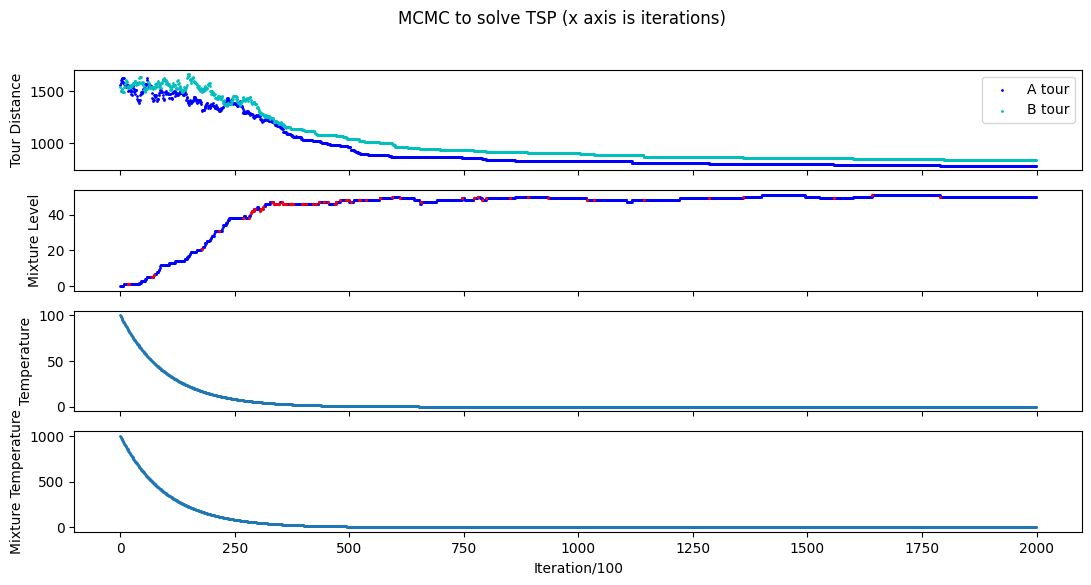

In [118]:
import matplotlib.pyplot as plt

ms = 1 # marker size

# Generate x-axis values (indices of the array)
indices = np.arange(len(tracking_data['dist_arr_a']))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(13, 6))
fig.suptitle('MCMC to solve TSP (x axis is iterations)')

# Create a line plot
ax1.scatter(indices, tracking_data['dist_arr_a'], c='b', marker='o', s=ms)
ax1.scatter(indices, tracking_data['dist_arr_b'], c='c', marker='o', s=ms)
ax1.legend(["A tour", "B tour"])
ax1.set_ylabel('Tour Distance')

# Plot 'mixt_arr' where 'newb_arr' is 0
ax2.scatter(indices[tracking_data['newb_arr'] == 0], 
         tracking_data['mixt_arr'][tracking_data['newb_arr'] == 0], 
         c='b', marker='o', s=ms, label='newb_arr=0')

# Plot 'mixt_arr' where 'newb_arr' is 1 with a different color and marker
ax2.scatter(indices[tracking_data['newb_arr'] == 1], 
         tracking_data['mixt_arr'][tracking_data['newb_arr'] == 1], 
         c='r', marker='x', s=ms*2, label='newb_arr=1')

# Add titles and labels
ax2.set_ylabel('Mixture Level')

ax3.scatter(indices, tracking_data['temp_arr'], marker='o', s=ms)
ax3.set_ylabel('Temperature')

ax4.scatter(indices, tracking_data['mixtemp_arr'], marker='o', s=ms)
ax4.set_ylabel('Mixture Temperature')
ax4.set_xlabel('Iteration/100')


# Show the plot
plt.show()

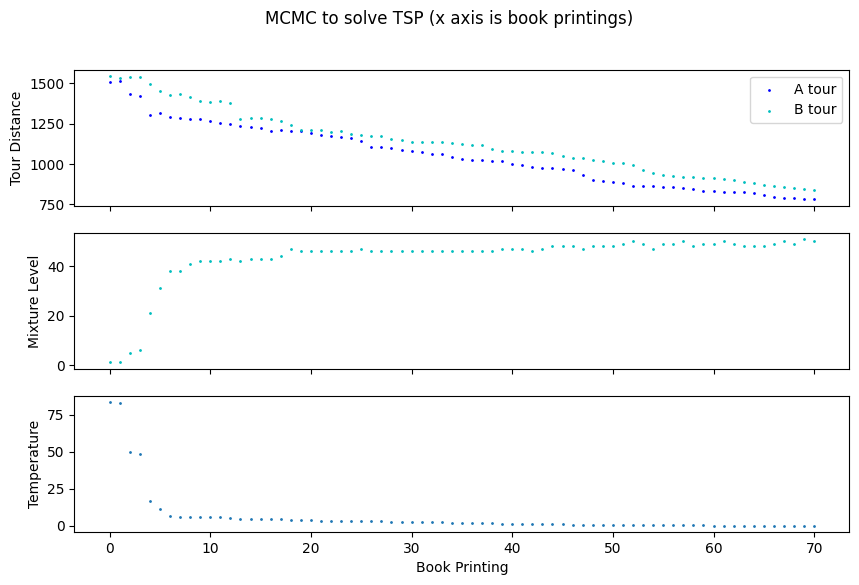

In [119]:
ms = 1 # marker size

tracking_data_books = {}

for key in tracking_data:
    new_array = []
    for i in range(len(tracking_data['newb_arr'])):
        if tracking_data['newb_arr'][i] == 1:
            new_array.append(tracking_data[key][i])
    tracking_data_books[key] = new_array

# Generate x-axis values (indices of the array)
indices = np.arange(len(tracking_data_books['dist_arr_a']))

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10, 6))
fig.suptitle('MCMC to solve TSP (x axis is book printings)')

# Create a line plot
ax1.scatter(indices, tracking_data_books['dist_arr_a'], c='b', marker='o', s=ms)
ax1.scatter(indices, tracking_data_books['dist_arr_b'], c='c', marker='o', s=ms)
ax1.legend(["A tour", "B tour"])
ax1.set_ylabel('Tour Distance')

ax2.scatter(indices, tracking_data_books['mixt_arr'], c='c', marker='o', s=ms)
ax2.set_ylabel('Mixture Level')

ax3.scatter(indices, tracking_data_books['temp_arr'], marker='o', s=ms)
ax3.set_ylabel('Temperature')
ax3.set_xlabel('Book Printing')


# Show the plot
plt.show()

[Text(0.5, 23.52222222222222, 'poem number'),
 Text(50.722222222222214, 0.5, 'tour number')]

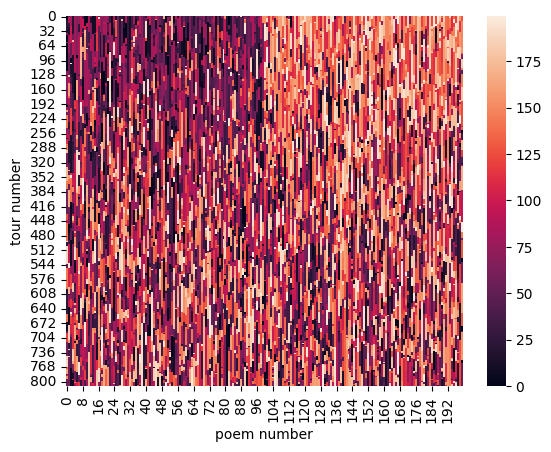

In [75]:
import seaborn as sns

ax = sns.heatmap(all_tours)
ax.set(xlabel = "poem number", ylabel="tour number")

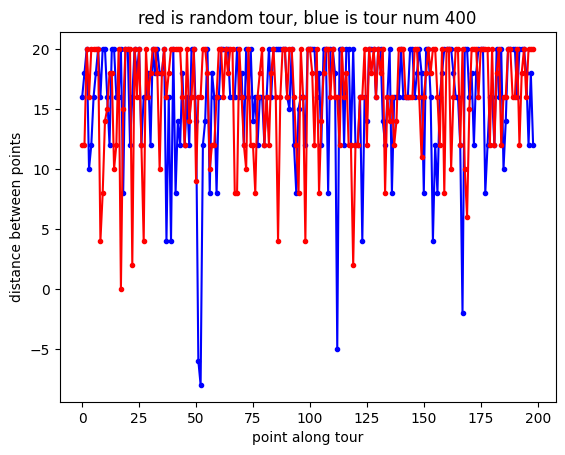

In [81]:
tour_num = 400

def get_tour_scores(tour):
    score_list = []
    for i in range(len(tour)-1):
        score_list.append(scores[tour[i], tour[i+1]])
    return score_list

random_tour = random.sample(list(range(len(data_raw))), len(data_raw))

best_score_list = get_tour_scores(all_tours[tour_num])
rand_score_list = get_tour_scores(random_tour)

indices = np.arange(len(best_score_list))

# Create a line plot
plt.plot(indices, best_score_list, c='b', marker='.')
plt.plot(indices, rand_score_list, c='r', marker='.')

# Add titles and labels
plt.title('red is random tour, blue is tour num '+str(tour_num))
plt.xlabel('point along tour')
plt.ylabel('distance between points')

# Show the plot
plt.show()

## Step 5: Calculate breathing / break points

To let the poems breath a little bit, find the poems with the most distance between them to create more vertical space between some of the poems.

In [82]:
def get_break_points(tour, percent=20):
    """score_list returns the score of poem i to poem i+1, 
    so if a breakpoint has index i, the break should come
    after poem i."""
    score_list = get_tour_scores(tour)
    ordered = np.argsort(score_list)[::-1]
    return ordered[:percent]

get_break_points(all_tours[0])

array([  0,  11, 121,  61, 123, 124, 125, 126, 127,  60,  55,  54,  53,
       133, 134, 135, 136, 137,  52, 141])

## Step 5: Let's write out the actual text of the books

In [83]:
for book_num in range(10):
    flename = f"booknum{book_num}.txt"
    tour = all_tours[book_num]
    breakpoints = get_break_points(tour)
    with open(f"output_books/{flename}", 'w') as fle:
        fle.write("PART 1\n\n\n\n")
        for k, index in enumerate(tour):
            if k == split_index:
                fle.write("\n\n***\n\n\n\nPART 2\n\n\n\n")
            if k in breakpoints:
                fle.write("\n\n***\n\n\n\n")
            poem = data_raw[index]
            fle.write(f"{poem}\n\n")